Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9002 - loss: 0.3392 - val_accuracy: 0.9640 - val_loss: 0.1273
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9551 - loss: 0.1470 - val_accuracy: 0.9732 - val_loss: 0.0889
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9662 - loss: 0.1078 - val_accuracy: 0.9783 - val_loss: 0.0785
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9721 - loss: 0.0888 - val_accuracy: 0.9775 - val_loss: 0.0742
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9771 - loss: 0.0726 - val_accuracy: 0.9812 - val_loss: 0.0695
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9792 - loss: 0.0650 - val_accuracy: 0.9812 - val_loss: 0.0692
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9819 - loss: 0.0555 - val_accuracy: 0.9832 - val_loss: 0.0693
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9835 - loss: 0.0503 - val_accu

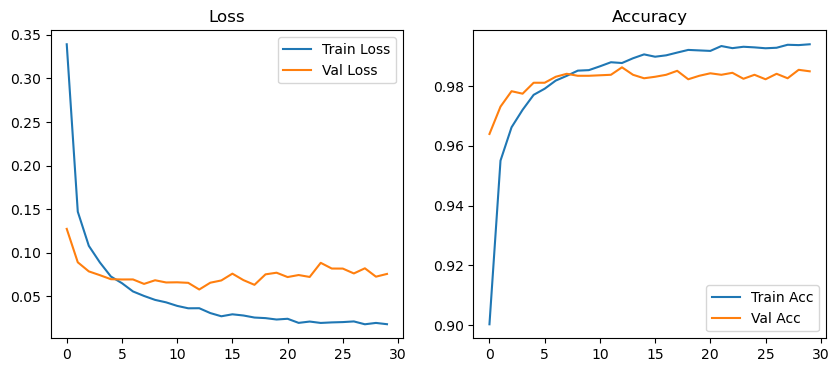

✅ Test Loss: 0.0791, Test Accuracy: 0.9822

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



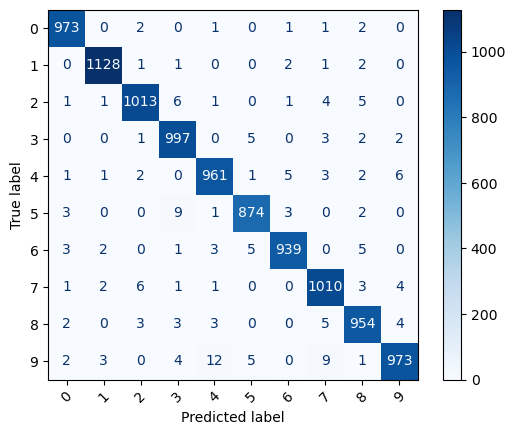

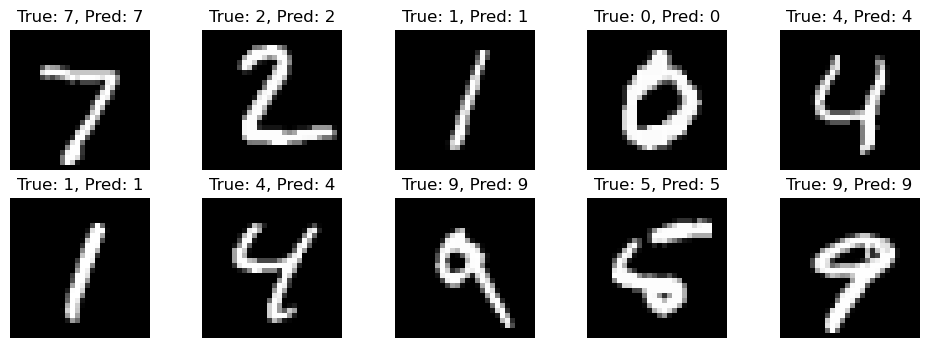

In [2]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 2. Load MNIST Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# 3. Preprocess Data
# Scale pixel values (0-255 → 0-1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten images: 28x28 → 784
X_train = X_train.reshape(X_train.shape[0], -1)  # (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)    # (10000, 784)

# One-hot encode labels (0–9 → 10 classes)
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# 4. Build ANN Model
model = models.Sequential([
    layers.Input(shape=(784,)),             # 28x28=784 input neurons
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),                    # prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output neurons (digits 0–9)
])

model.summary()

# 5. Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train Model
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.1,   # 10% training data for validation
    epochs=30,
    batch_size=128,
    verbose=1
)

# 7. Plot Training History
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(); plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend(); plt.title("Accuracy")
plt.show()

# 8. Evaluate on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"✅ Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# 9. Predictions & Report
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

# 10. Visualize Some Predictions
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    plt.axis("off")
plt.show()


In [3]:
# Save trained model in keras format
model.save("mnist_ann_model.keras")
print("✅ Model saved as mnist_ann_model.keras")


✅ Model saved as mnist_ann_model.keras


In [1]:
import os
print("Current Notebook Folder:", os.getcwd())


Current Notebook Folder: C:\Users\HP
